# Convolutional Neural Network (DCN) on the Fashion MNIST dataset

Epoch 1/10
375/375 [==============================] - 10s 26ms/step - loss: 0.6517 - accuracy: 0.7607 - val_loss: 0.4955 - val_accuracy: 0.8163
Epoch 2/10
375/375 [==============================] - 9s 25ms/step - loss: 0.3979 - accuracy: 0.8558 - val_loss: 0.3610 - val_accuracy: 0.8632
Epoch 3/10
375/375 [==============================] - 9s 24ms/step - loss: 0.3386 - accuracy: 0.8778 - val_loss: 0.3351 - val_accuracy: 0.8772
Epoch 4/10
375/375 [==============================] - 9s 25ms/step - loss: 0.3069 - accuracy: 0.8873 - val_loss: 0.3212 - val_accuracy: 0.8802
Epoch 5/10
375/375 [==============================] - 9s 25ms/step - loss: 0.2816 - accuracy: 0.8981 - val_loss: 0.2957 - val_accuracy: 0.8908
Epoch 6/10
375/375 [==============================] - 10s 26ms/step - loss: 0.2598 - accuracy: 0.9067 - val_loss: 0.2894 - val_accuracy: 0.8916
Epoch 7/10
375/375 [==============================] - 10s 26ms/step - loss: 0.2426 - accuracy: 0.9125 - val_loss: 0.2767 - val_accuracy: 0.8

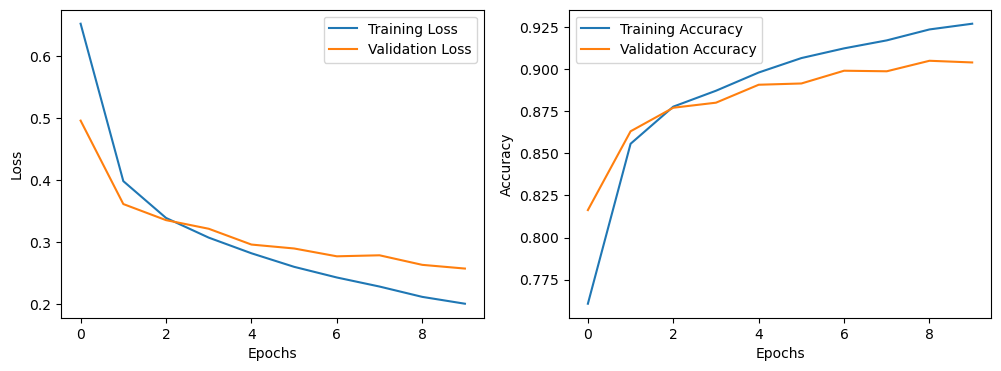

313/313 [==============================] - 2s 6ms/step - loss: 0.2741 - accuracy: 0.9030
Test Accuracy: 90.30%
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1833 - accuracy: 0.9338
Train Accuracy: 93.38%


In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Scale the pixel values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Define the CNN architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model with optimizer and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Reshape the data for the CNN
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
val_images = val_images.reshape(val_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Set the batch size and number of epochs
batch_size = 128
epochs = 10

# Train the model
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(val_images, val_labels))

# Plot the training and validation loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Evaluate the model on the train data
train_loss, train_accuracy = model.evaluate(train_images, train_labels)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")


In [2]:
# Print out the list of images in the train dataset
print("Train dataset:")
for i in range(len(train_images)):
    print(f"Image {i}: Shape {train_images[i].shape}, Label {train_labels[i]}")

# Print out the list of images in the test dataset
print("Test dataset:")
for i in range(len(test_images)):
    print(f"Image {i}: Shape {test_images[i].shape}, Label {test_labels[i]}")

Train dataset:
Image 0: Shape (28, 28, 1), Label 7
Image 1: Shape (28, 28, 1), Label 3
Image 2: Shape (28, 28, 1), Label 5
Image 3: Shape (28, 28, 1), Label 8
Image 4: Shape (28, 28, 1), Label 6
Image 5: Shape (28, 28, 1), Label 9
Image 6: Shape (28, 28, 1), Label 3
Image 7: Shape (28, 28, 1), Label 3
Image 8: Shape (28, 28, 1), Label 9
Image 9: Shape (28, 28, 1), Label 9
Image 10: Shape (28, 28, 1), Label 3
Image 11: Shape (28, 28, 1), Label 2
Image 12: Shape (28, 28, 1), Label 1
Image 13: Shape (28, 28, 1), Label 7
Image 14: Shape (28, 28, 1), Label 8
Image 15: Shape (28, 28, 1), Label 1
Image 16: Shape (28, 28, 1), Label 9
Image 17: Shape (28, 28, 1), Label 7
Image 18: Shape (28, 28, 1), Label 0
Image 19: Shape (28, 28, 1), Label 0
Image 20: Shape (28, 28, 1), Label 9
Image 21: Shape (28, 28, 1), Label 8
Image 22: Shape (28, 28, 1), Label 0
Image 23: Shape (28, 28, 1), Label 6
Image 24: Shape (28, 28, 1), Label 3
Image 25: Shape (28, 28, 1), Label 9
Image 26: Shape (28, 28, 1), Labe

Image 12922: Shape (28, 28, 1), Label 5
Image 12923: Shape (28, 28, 1), Label 8
Image 12924: Shape (28, 28, 1), Label 7
Image 12925: Shape (28, 28, 1), Label 6
Image 12926: Shape (28, 28, 1), Label 8
Image 12927: Shape (28, 28, 1), Label 1
Image 12928: Shape (28, 28, 1), Label 6
Image 12929: Shape (28, 28, 1), Label 5
Image 12930: Shape (28, 28, 1), Label 9
Image 12931: Shape (28, 28, 1), Label 7
Image 12932: Shape (28, 28, 1), Label 8
Image 12933: Shape (28, 28, 1), Label 6
Image 12934: Shape (28, 28, 1), Label 5
Image 12935: Shape (28, 28, 1), Label 6
Image 12936: Shape (28, 28, 1), Label 7
Image 12937: Shape (28, 28, 1), Label 7
Image 12938: Shape (28, 28, 1), Label 6
Image 12939: Shape (28, 28, 1), Label 6
Image 12940: Shape (28, 28, 1), Label 2
Image 12941: Shape (28, 28, 1), Label 4
Image 12942: Shape (28, 28, 1), Label 4
Image 12943: Shape (28, 28, 1), Label 3
Image 12944: Shape (28, 28, 1), Label 5
Image 12945: Shape (28, 28, 1), Label 4
Image 12946: Shape (28, 28, 1), Label 3


Image 35442: Shape (28, 28, 1), Label 7
Image 35443: Shape (28, 28, 1), Label 4
Image 35444: Shape (28, 28, 1), Label 2
Image 35445: Shape (28, 28, 1), Label 8
Image 35446: Shape (28, 28, 1), Label 6
Image 35447: Shape (28, 28, 1), Label 7
Image 35448: Shape (28, 28, 1), Label 4
Image 35449: Shape (28, 28, 1), Label 9
Image 35450: Shape (28, 28, 1), Label 4
Image 35451: Shape (28, 28, 1), Label 7
Image 35452: Shape (28, 28, 1), Label 5
Image 35453: Shape (28, 28, 1), Label 4
Image 35454: Shape (28, 28, 1), Label 0
Image 35455: Shape (28, 28, 1), Label 9
Image 35456: Shape (28, 28, 1), Label 8
Image 35457: Shape (28, 28, 1), Label 7
Image 35458: Shape (28, 28, 1), Label 3
Image 35459: Shape (28, 28, 1), Label 2
Image 35460: Shape (28, 28, 1), Label 7
Image 35461: Shape (28, 28, 1), Label 7
Image 35462: Shape (28, 28, 1), Label 5
Image 35463: Shape (28, 28, 1), Label 1
Image 35464: Shape (28, 28, 1), Label 1
Image 35465: Shape (28, 28, 1), Label 3
Image 35466: Shape (28, 28, 1), Label 3


Image 37068: Shape (28, 28, 1), Label 8
Image 37069: Shape (28, 28, 1), Label 1
Image 37070: Shape (28, 28, 1), Label 3
Image 37071: Shape (28, 28, 1), Label 6
Image 37072: Shape (28, 28, 1), Label 6
Image 37073: Shape (28, 28, 1), Label 0
Image 37074: Shape (28, 28, 1), Label 7
Image 37075: Shape (28, 28, 1), Label 8
Image 37076: Shape (28, 28, 1), Label 1
Image 37077: Shape (28, 28, 1), Label 7
Image 37078: Shape (28, 28, 1), Label 9
Image 37079: Shape (28, 28, 1), Label 4
Image 37080: Shape (28, 28, 1), Label 3
Image 37081: Shape (28, 28, 1), Label 4
Image 37082: Shape (28, 28, 1), Label 6
Image 37083: Shape (28, 28, 1), Label 0
Image 37084: Shape (28, 28, 1), Label 5
Image 37085: Shape (28, 28, 1), Label 0
Image 37086: Shape (28, 28, 1), Label 2
Image 37087: Shape (28, 28, 1), Label 8
Image 37088: Shape (28, 28, 1), Label 2
Image 37089: Shape (28, 28, 1), Label 8
Image 37090: Shape (28, 28, 1), Label 1
Image 37091: Shape (28, 28, 1), Label 6
Image 37092: Shape (28, 28, 1), Label 7


Image 39949: Shape (28, 28, 1), Label 8
Image 39950: Shape (28, 28, 1), Label 8
Image 39951: Shape (28, 28, 1), Label 6
Image 39952: Shape (28, 28, 1), Label 7
Image 39953: Shape (28, 28, 1), Label 0
Image 39954: Shape (28, 28, 1), Label 3
Image 39955: Shape (28, 28, 1), Label 2
Image 39956: Shape (28, 28, 1), Label 0
Image 39957: Shape (28, 28, 1), Label 1
Image 39958: Shape (28, 28, 1), Label 0
Image 39959: Shape (28, 28, 1), Label 4
Image 39960: Shape (28, 28, 1), Label 2
Image 39961: Shape (28, 28, 1), Label 0
Image 39962: Shape (28, 28, 1), Label 0
Image 39963: Shape (28, 28, 1), Label 0
Image 39964: Shape (28, 28, 1), Label 1
Image 39965: Shape (28, 28, 1), Label 3
Image 39966: Shape (28, 28, 1), Label 4
Image 39967: Shape (28, 28, 1), Label 7
Image 39968: Shape (28, 28, 1), Label 7
Image 39969: Shape (28, 28, 1), Label 4
Image 39970: Shape (28, 28, 1), Label 6
Image 39971: Shape (28, 28, 1), Label 4
Image 39972: Shape (28, 28, 1), Label 7
Image 39973: Shape (28, 28, 1), Label 6


Image 44348: Shape (28, 28, 1), Label 5
Image 44349: Shape (28, 28, 1), Label 3
Image 44350: Shape (28, 28, 1), Label 4
Image 44351: Shape (28, 28, 1), Label 1
Image 44352: Shape (28, 28, 1), Label 2
Image 44353: Shape (28, 28, 1), Label 3
Image 44354: Shape (28, 28, 1), Label 9
Image 44355: Shape (28, 28, 1), Label 3
Image 44356: Shape (28, 28, 1), Label 1
Image 44357: Shape (28, 28, 1), Label 0
Image 44358: Shape (28, 28, 1), Label 8
Image 44359: Shape (28, 28, 1), Label 5
Image 44360: Shape (28, 28, 1), Label 9
Image 44361: Shape (28, 28, 1), Label 5
Image 44362: Shape (28, 28, 1), Label 6
Image 44363: Shape (28, 28, 1), Label 5
Image 44364: Shape (28, 28, 1), Label 7
Image 44365: Shape (28, 28, 1), Label 8
Image 44366: Shape (28, 28, 1), Label 2
Image 44367: Shape (28, 28, 1), Label 5
Image 44368: Shape (28, 28, 1), Label 4
Image 44369: Shape (28, 28, 1), Label 7
Image 44370: Shape (28, 28, 1), Label 5
Image 44371: Shape (28, 28, 1), Label 1
Image 44372: Shape (28, 28, 1), Label 4


Image 46976: Shape (28, 28, 1), Label 0
Image 46977: Shape (28, 28, 1), Label 2
Image 46978: Shape (28, 28, 1), Label 6
Image 46979: Shape (28, 28, 1), Label 9
Image 46980: Shape (28, 28, 1), Label 3
Image 46981: Shape (28, 28, 1), Label 8
Image 46982: Shape (28, 28, 1), Label 1
Image 46983: Shape (28, 28, 1), Label 6
Image 46984: Shape (28, 28, 1), Label 3
Image 46985: Shape (28, 28, 1), Label 6
Image 46986: Shape (28, 28, 1), Label 5
Image 46987: Shape (28, 28, 1), Label 7
Image 46988: Shape (28, 28, 1), Label 0
Image 46989: Shape (28, 28, 1), Label 7
Image 46990: Shape (28, 28, 1), Label 5
Image 46991: Shape (28, 28, 1), Label 7
Image 46992: Shape (28, 28, 1), Label 3
Image 46993: Shape (28, 28, 1), Label 6
Image 46994: Shape (28, 28, 1), Label 2
Image 46995: Shape (28, 28, 1), Label 1
Image 46996: Shape (28, 28, 1), Label 7
Image 46997: Shape (28, 28, 1), Label 1
Image 46998: Shape (28, 28, 1), Label 4
Image 46999: Shape (28, 28, 1), Label 9
Image 47000: Shape (28, 28, 1), Label 3
